**Agrupar usuarios Twitter de acuerdo a su personalidad con K-means**

Como ejemplo utilizaremos de entradas un conjunto de datos en el que se analizaban rasgos de la personalidad de usuarios de Twitter. Son 140 de persanas “famosas” del mundo en diferentes areas: deporte, cantantes, actores, etc. Las características de entrada son:

    usuario (el nombre en Twitter)
    “op” = Openness to experience – grado de apertura mental a nuevas experiencias, curiosidad, arte
    “co” =Conscientiousness – grado de orden, prolijidad, organización
    “ex” = Extraversion – grado de timidez, solitario o participación ante el grupo social
    “ag” = Agreeableness – grado de empatía con los demás, temperamento
    “ne” = Neuroticism, – grado de neuroticismo, nervioso, irritabilidad, seguridad en sí mismo.
    Wordcount – Cantidad promedio de palabras usadas en sus tweets
    Categoria – Actividad laboral del usuario (actor, cantante, etc.)

Se usa K-means para agrupar estos usuarios segun sus similitudes en la personalidad. Sólo se usan 3 dimensiones en este ejemplo, de modo que podamos ver en un gráfico tridimensional -y sus proyecciones a 2D- los grupos resultantes. 

Hipótesis que se hace : “Todos los cantantes tendrán personalidad parecida” (y así con cada rubro laboral). 

Veremos si lo probamos, o por el contrario, los grupos no están relacionados necesariamente con la actividad de estas Celebridades.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

from google.colab import files
files.upload()
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

Veamos el archivo de twitters

In [2]:
dataframe = pd.read_csv(r"analisis.csv")
dataframe.head()

FileNotFoundError: ignored

Veamos una tabla de información estadística de dataframe:

In [ ]:
dataframe.describe()

El archivo contiene diferenciadas 9 categorías -actividades laborales- que son:

    1.Actor/actriz
    2.Cantante
    3.Modelo
    4.Tv, series
    5.Radio
    6.Tecnología
    7.Deportes
    8.Politica
    9.Escritor


Para saber cuantos registros tenemos de cada uno hacemos:

In [ ]:
print(dataframe.groupby('categoria').size())

Veamos graficamente nuestros datos para conocer la dispersión de los mismos:

In [ ]:
dataframe.drop(['categoria'],1).hist()
plt.show()

Seleccionemos 3 dimensiones: op, ex y ag y las cruzamos para ver si nos dan alguna pista de su agrupación y la relación con sus categorías.

In [ ]:
sb.pairplot(dataframe.dropna(), hue='categoria',size=4,vars=["op","ex","ag"],kind='scatter')

No se ve algún tipo de agrupación o correlación entre los usuarios y sus categorías.

Concretamos la estructura de datos que utilizaremos para alimentar a k-means, sólo con las columnas op, ex y ag en nuestra variable X.

In [ ]:
X = np.array(dataframe[["op","ex","ag"]])
y = np.array(dataframe['categoria'])
X.shape

(140, 3)

Veamos gráficamente en 3D con 9 colores representando las categorías.

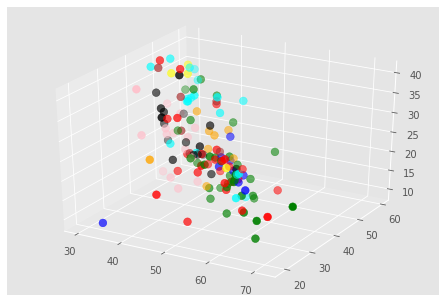

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

Vamos a hallar el valor de K haciendo una gráfica e intentando hallar el “punto de codo” que comentábamos antes.

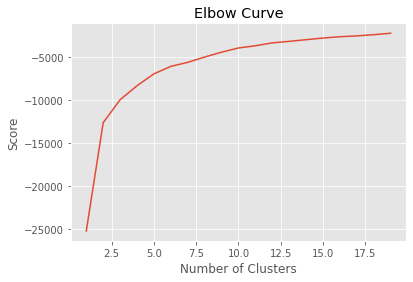

In [ ]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Ejecutamos el algoritmo para 5 clusters y obtenemos las etiquetas y los centroids.

In [ ]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[49.6606333  41.17669023 17.548775  ]
 [34.5303535  48.01261321 35.01749504]
 [39.63830586 44.75784737 25.86962057]
 [42.302263   33.65449587 20.812626  ]
 [57.92200861 31.5039735  15.67199517]]


Veamos en una gráfica 3D con colores los grupos: (las estrellas marcan el centro de cada cluster)

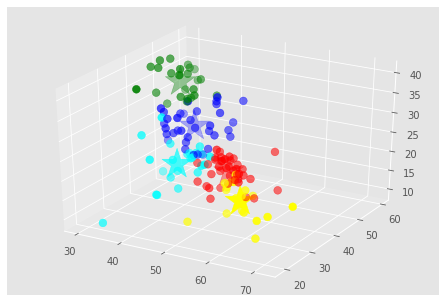

In [ ]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

Aqui podemos ver que el Algoritmo de K-Means con K=5 ha agrupado a los 140 usuarios Twitter por su personalidad, teniendo en cuenta las 3 dimensiones que utilizamos: Openess, Extraversion y Agreeablenes. 


Haremos 3 gráficas en 2 dimensiones con las proyecciones a partir de nuestra gráfica 3D para que nos ayude a visualizar los grupos y su clasificación:

Openness to experience vs Extraversion 

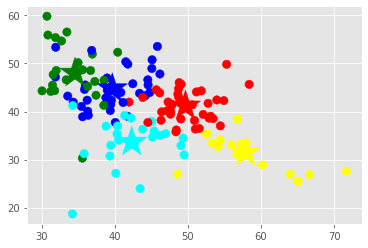

In [ ]:
# Getting the values and plotting it
f1 = dataframe['op'].values
f2 = dataframe['ex'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

Openness to experience vs Agreeableness

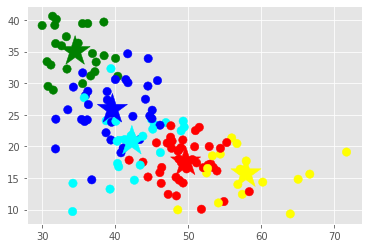

In [ ]:
# Getting the values and plotting it
f1 = dataframe['op'].values
f2 = dataframe['ag'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

Extraversion vs Agreeableness

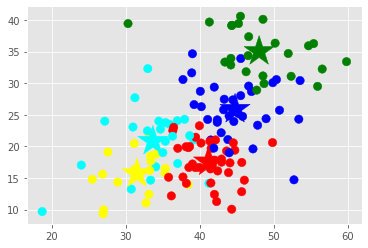

In [ ]:
f1 = dataframe['ex'].values
f2 = dataframe['ag'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

Podemos ver cada uno de los clusters cuantos usuarios tiene:

In [ ]:
copy =  pd.DataFrame()
copy['usuario']=dataframe['usuario'].values
copy['categoria']=dataframe['categoria'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,40
1,green,24
2,blue,35
3,cyan,23
4,yellow,18


Podemos ver la diversidad en rubros laborales de cada uno. Por ejemplo en el grupo 0 (rojo), veamos que actividades laborales hay y cual predomina.

In [ ]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()
diversidadGrupo

,categoria,cantidad
0,0,NaN
1,1,10.0
2,2,14.0
3,3,6.0
4,4,3.0
5,5,1.0
6,6,2.0
7,7,2.0
8,8,1.0
9,9,1.0


Busquemos los usuarios que están más cerca a los centroids de cada grupo que podríamos decir que tienen los rasgos de personalidad característicos que representan a cada cluster:

In [ ]:
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([ 21,  35, 107,  91,  82])

In [ ]:
users=dataframe['usuario'].values
for row in closest:
    print(users[row])

carmenelectra
DaniMateoAgain
Pablo_Iglesias_
kobebryant
JudgeJudy


Podemos agrupar y etiquetar nuevos usuarios twitter con sus características y clasificarlos. Vemos el ejemplo con el usuario de David Guetta y nos devuelve que pertenece al grupo 1 (verde).

In [ ]:
X_new = np.array([[45.92,57.74,15.66]]) #davidguetta
 
new_labels = kmeans.predict(X_new)
print(new_labels)

[0]


**Tarea:**

Hacer agrupamientieno usando otras de las 8 columnas de entrada. Plantearse algunas hipotesis